# PubMed search for Gene Ontology vs for Cognitive Ontology
Here, I visualize the number of pubmed search results for Gene Ontology vs for Cognitive Ontology, in order to illustrate the success of the gene ontology and the lack of discussion about a cogntive ontology. 

The exact search terms were:
- **Gene ontology**: '"gene* ontolog*" NOT brain'
- **Cognitive ontology**: '("cognitive ontolog*" OR "functional ontolog*") AND (brain OR neuro*) NOT gene'

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# load files
cog_file = "PubMed_Timeline_Results_by_Year__cognitive_ontology.csv"
gen_file = "PubMed_Timeline_Results_by_Year__gene_ontology.csv"


cog_data = pd.read_csv(cog_file, header=1, index_col='Year')
gen_data = pd.read_csv(gen_file, header=1, index_col='Year')

cog_data.rename(columns={'Count': '\"Cognitive ontology\"'}, inplace=True)
gen_data.rename(columns={'Count': '\"Gene ontology\"'}, inplace=True)

# merge the two dataframes 
data = gen_data.merge(right=cog_data, how='outer', 
               left_index=True, right_index=True)

# drop the year 2021
data.drop(index=2021, inplace=True)

# get the search strings
cog_search_str = pd.read_csv(cog_file, header=0).columns[0].replace("Search query: ", "")
gen_search_str = pd.read_csv(gen_file, header=0).columns[0].replace("Search query: ", "")

# replace nan's with 0's
# data.fillna(0, inplace=True)

data

,"""Gene ontology""","""Cognitive ontology"""
Year,,
2000,2,NaN
2001,5,NaN
2002,34,NaN
2003,88,NaN
2004,180,NaN
2005,307,1.0
2006,385,NaN
2007,464,1.0
2008,501,1.0


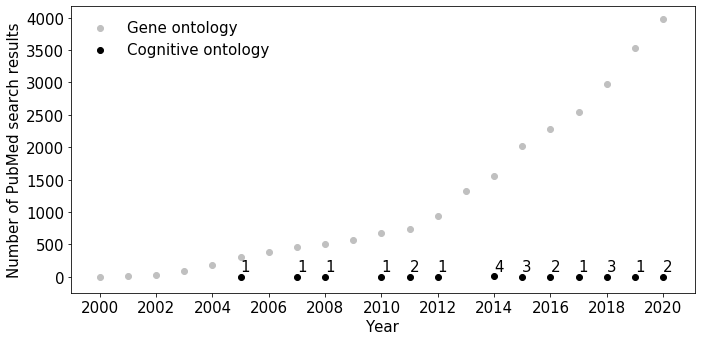

In [2]:

plt.rcParams.update({'font.size': 15})

fig, ax = plt.subplots(figsize=(10,5))

years = list(data.index)
xticks = np.arange(2000, 2021, 2).astype(int)
ax.scatter(years, list(data['"Gene ontology"']), color="silver",
         label="Gene ontology") #\n\" %s \""%gen_search_str)
cog = list(data['"Cognitive ontology"'])
cog_color="black"
ax.scatter(years, cog, label="Cognitive ontology", color=cog_color) #\n\" %s \""%cog_search_str, color='orange')

for i, txt in enumerate(cog):
    ax.annotate('%0.f'%txt, (years[i], cog[i]+80), color=cog_color)
                        
ax.set_ylabel('Number of PubMed search results')
ax.set_xlabel('Year')
plt.xticks(xticks)
l = ax.legend(title='', framealpha=0)
# fig_description = ("Figure 1. bla " + 
#                    "PubMed search string for Gene ontology:\n%s\n\n" %gen_search_str +
#                    "PubMed search string for Cognitive ontology:\n %s" %cog_search_str)
# plt.title(fig_description, y=-0.9, x=-.1, loc='left')
plt.tight_layout()